<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [4]:
# loading the data: Wholesale customers data

data = pd.read_csv('wholesale_customers_data.csv')

# Check for missing data and basic statistics
missing_data = data.isnull().sum()
basic_statistics = data.describe()

# Check for column-wise correlation
correlation_matrix = data.corr()

# Display the results
missing_data, basic_statistics, correlation_matrix


(Channel             0
 Region              0
 Fresh               0
 Milk                0
 Grocery             0
 Frozen              0
 Detergents_Paper    0
 Delicassen          0
 dtype: int64,
           Channel      Region          Fresh          Milk       Grocery  \
 count  440.000000  440.000000     440.000000    440.000000    440.000000   
 mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
 std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
 min      1.000000    1.000000       3.000000     55.000000      3.000000   
 25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
 50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
 75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
 max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   
 
              Frozen  Detergents_Paper    Delicassen  
 count    440.000000        440.000000    440.00000

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [ ]:
# Your code here:

**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

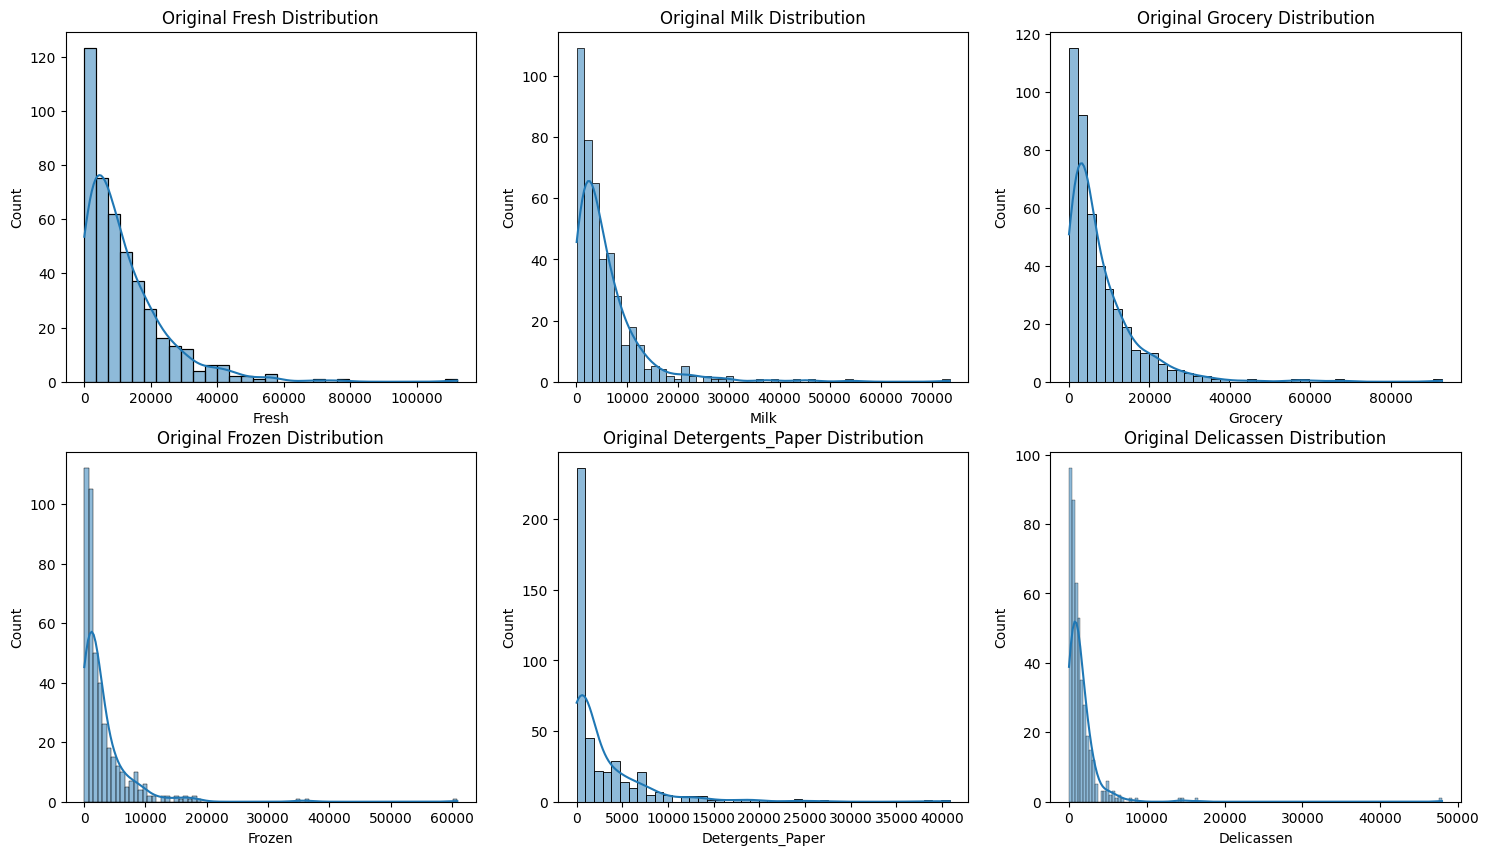

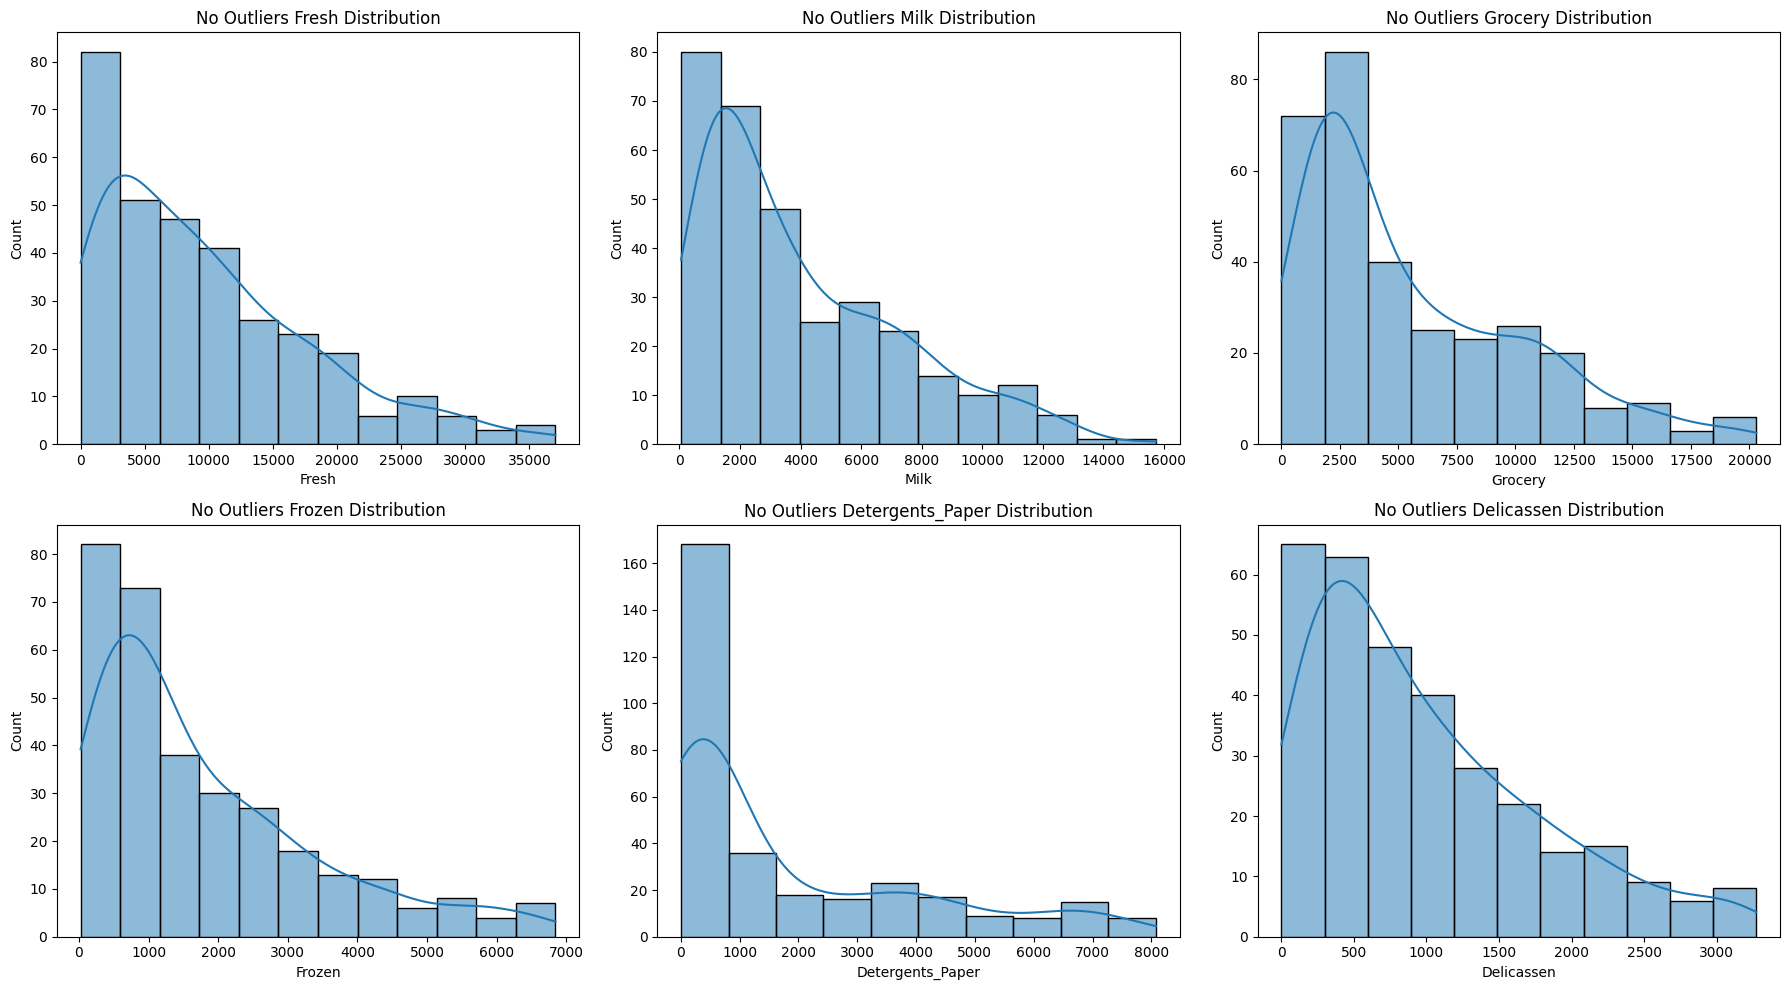

In [6]:
# Adjust the layout for 6 columns
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axs array to easily access with a single index
axs = axs.ravel()

# Plot histograms of original data
for i, col in enumerate(columns_to_check):
    sns.histplot(data[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Original {col} Distribution')

# Plot histograms of data without outliers in the same figure
fig, axs_no_outliers = plt.subplots(2, 3, figsize=(18, 10))
axs_no_outliers = axs_no_outliers.ravel()

# Histograms without outliers
for i, col in enumerate(columns_to_check):
    sns.histplot(data_no_outliers[col], kde=True, ax=axs_no_outliers[i])
    axs_no_outliers[i].set_title(f'No Outliers {col} Distribution')

plt.tight_layout()
plt.show()


**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [10]:
# Challenge 3: Data Preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Scale the data
scaler = StandardScaler()
customers_scale = scaler.fit_transform(data_no_outliers[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

# Create a DataFrame of the scaled data for easy visualization
scaled_df = pd.DataFrame(customers_scale, columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
print("Scaled Data (first 5 rows):\n", scaled_df.head())


Scaled Data (first 5 rows):
       Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.360420  1.740710  0.432714 -0.984801          0.378277    0.451178
1 -0.325039  1.788015  0.867526 -0.023386          0.659241    1.009718
2  0.433216 -0.857996 -0.290889  2.859618         -0.605321    1.025020
3 -0.037274  1.311586 -0.094823 -0.704078         -0.020699    0.595276
4  0.294097 -0.242723  0.305758 -0.819597          0.589794   -0.560060


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [11]:
# Challenge 4: Data Clustering with K-Means
from sklearn.cluster import KMeans

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters for this example
kmeans.fit(customers_scale)

# Step 3: Assign cluster labels to the original data without outliers
data_no_outliers['Cluster_Labels'] = kmeans.labels_

# Display the first few rows of the updated dataset with cluster labels
print("Data with Cluster Labels (first 5 rows):\n", data_no_outliers.head())


Data with Cluster Labels (first 5 rows):
    Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
3        1       3  13265  1196     4221    6404               507   
5        2       3   9413  8259     5126     666              1795   
6        2       3  12126  3199     6975     480              3140   

   Delicassen  Cluster_Labels  
0        1338               0  
1        1776               0  
3        1788               1  
5        1451               0  
6         545               2  


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Looking to the elbow we can choose 2 like the correct number of clusters

In [12]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clean_customers['Label'] = clusters

Count the values in `labels`.

In [ ]:
# Your code here:

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [15]:
# Challenge 5: Data Clustering with DBSCAN
from sklearn.cluster import DBSCAN

# Step 1: Initialize and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(customers_scale)

# Step 2: Get the labels and assign them to a new column in the original dataframe
labels_DBSCAN = dbscan.labels_
data_no_outliers['labels_DBSCAN'] = labels_DBSCAN

# Step 3: Count the values in labels_DBSCAN
print("DBSCAN Cluster Label Counts:\n", data_no_outliers['labels_DBSCAN'].value_counts())


DBSCAN Cluster Label Counts:
 -1    282
 0     23
 1     13
Name: labels_DBSCAN, dtype: int64


Count the values in `labels_DBSCAN`.

In [26]:
# Yukarida yapildi 


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [18]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

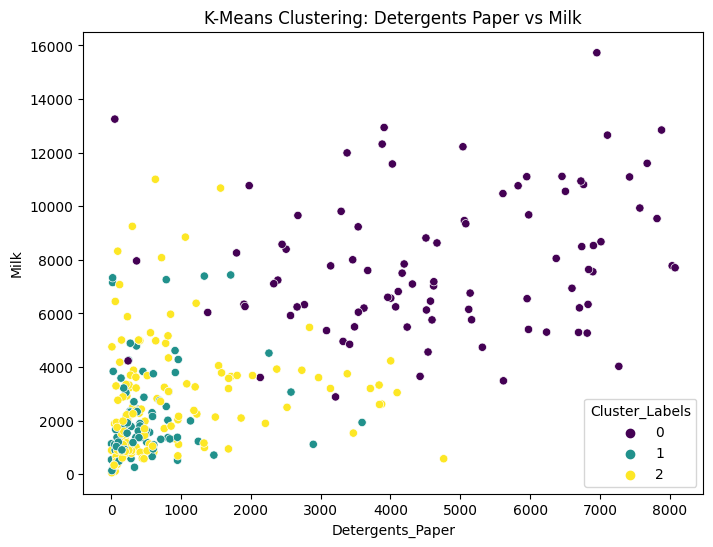

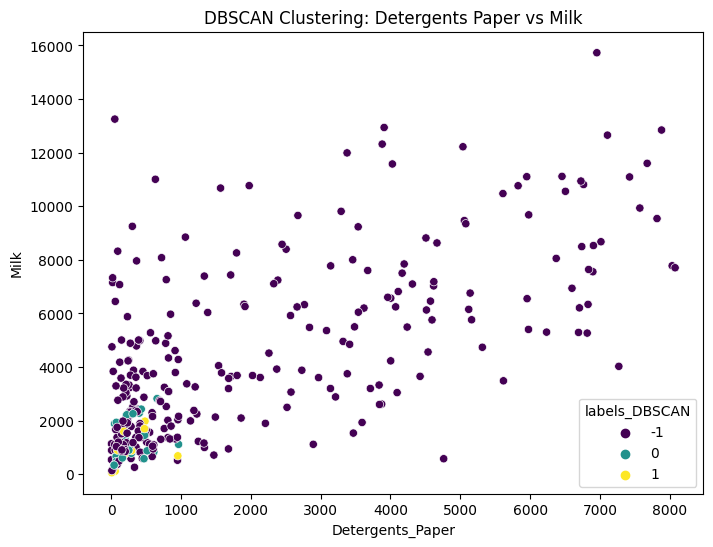

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot scatter plots with given x, y columns and hue
def plot_clusters(data, x, y, hue, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x, y=y, hue=hue, palette='viridis')
    plt.title(title)
    plt.show()


# K-Means Clustering Visualization
plot_clusters(data_no_outliers, x='Detergents_Paper', y='Milk', hue='Cluster_Labels', title='K-Means Clustering: Detergents Paper vs Milk')

# DBSCAN Clustering Visualization
plot_clusters(data_no_outliers, x='Detergents_Paper', y='Milk', hue='labels_DBSCAN', title='DBSCAN Clustering: Detergents Paper vs Milk')


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

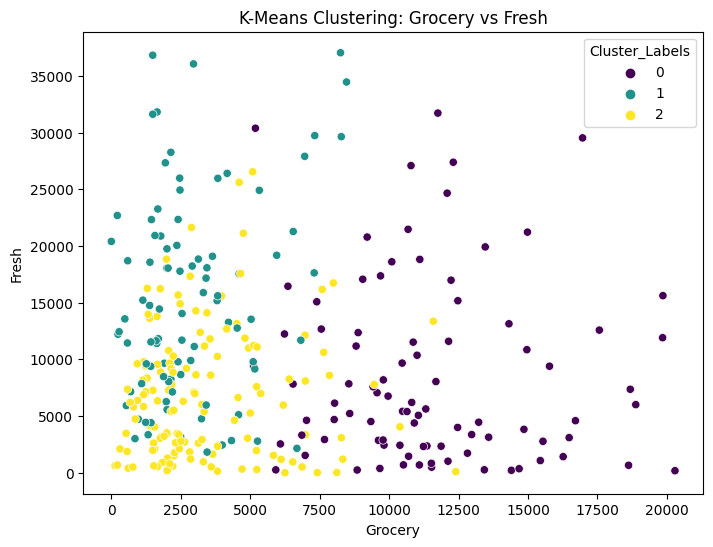

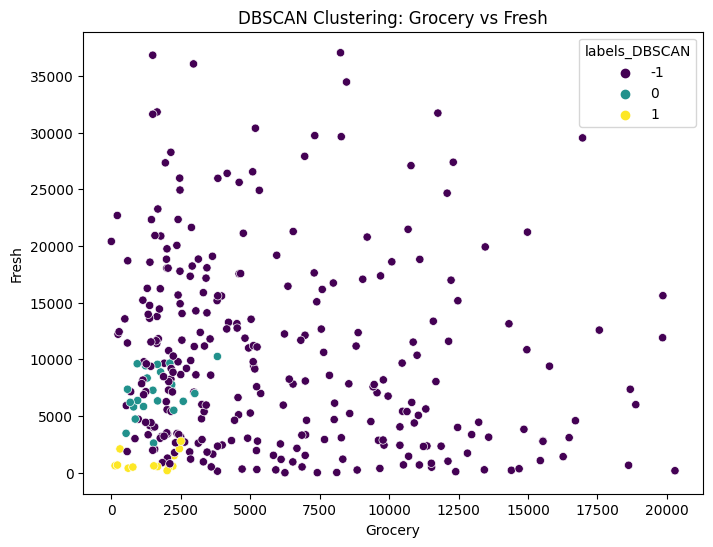

In [21]:
# K-Means Clustering Visualization
plot_clusters(data_no_outliers, x='Grocery', y='Fresh', hue='Cluster_Labels', title='K-Means Clustering: Grocery vs Fresh')

# DBSCAN Clustering Visualization
plot_clusters(data_no_outliers, x='Grocery', y='Fresh', hue='labels_DBSCAN', title='DBSCAN Clustering: Grocery vs Fresh')


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

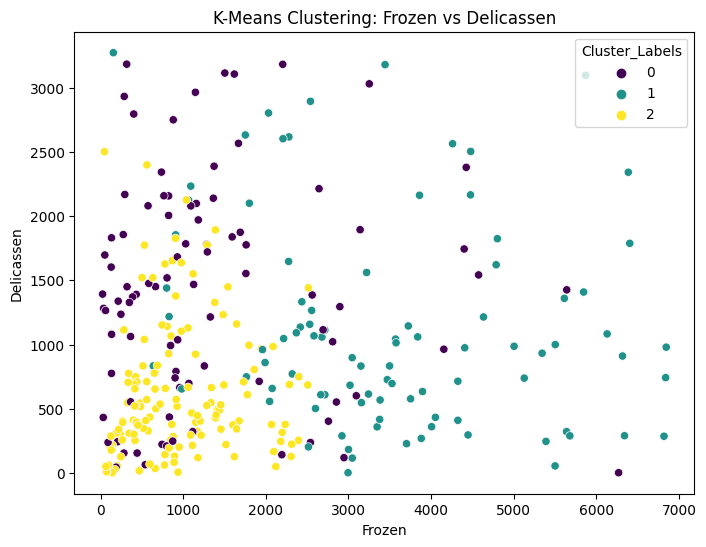

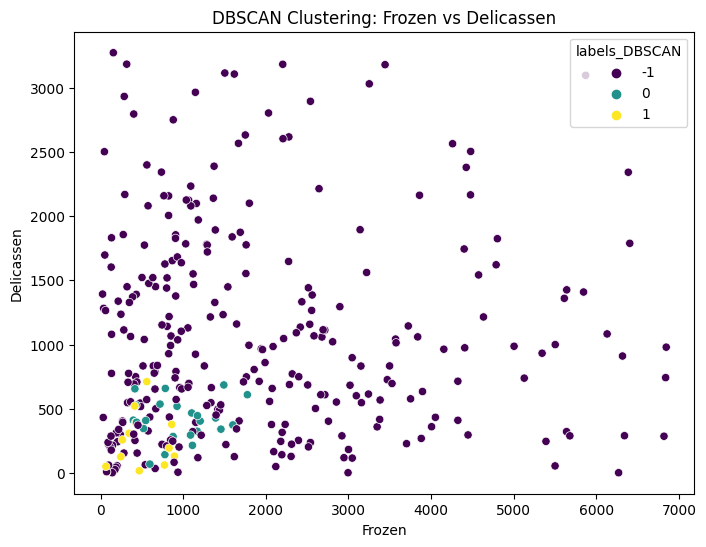

In [22]:
# K-Means Clustering Visualization
plot_clusters(data_no_outliers, x='Frozen', y='Delicassen', hue='Cluster_Labels', title='K-Means Clustering: Frozen vs Delicassen')

# DBSCAN Clustering Visualization
plot_clusters(data_no_outliers, x='Frozen', y='Delicassen', hue='labels_DBSCAN', title='DBSCAN Clustering: Frozen vs Delicassen')


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [23]:
# Group by K-Means cluster labels and calculate mean
kmeans_grouped = data_no_outliers.groupby('Cluster_Labels').mean()
print("K-Means Cluster Group Means:\n", kmeans_grouped)

# Group by DBSCAN cluster labels and calculate mean
dbscan_grouped = data_no_outliers.groupby('labels_DBSCAN').mean()
print("DBSCAN Cluster Group Means:\n", dbscan_grouped)


K-Means Cluster Group Means:
                  Channel    Region         Fresh         Milk       Grocery  \
Cluster_Labels                                                                
0               1.811111  2.688889   8444.433333  7868.100000  11551.566667   
1               1.021978  2.428571  15344.307692  2144.692308   2908.142857   
2               1.080292  2.562044   6817.854015  2666.145985   3393.934307   

                     Frozen  Detergents_Paper   Delicassen  labels_DBSCAN  
Cluster_Labels                                                             
0               1343.744444       4688.611111  1393.900000      -1.000000  
1               3524.703297        518.736264  1123.923077      -1.000000  
2                953.321168        847.678832   622.226277      -0.642336  
DBSCAN Cluster Group Means:
                 Channel    Region         Fresh         Milk      Grocery  \
labels_DBSCAN                                                               
-1         

Which algorithm appears to perform better?

**Your observations here**

- 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [41]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 